# Regression

Simple Linear Regression

Multiple Linear Regression

### Polynomial Regression

Support Vector for Regression (SVR)

Decision Tree Regression

Random Forest Regression

### formula(
dependent variable *(y0) = y-intercept(b0 constant) + (slope coefficient (b1) * (independent variable (x1))+ (slope coefficient (b2 * (independent variable (x1)2 **2)) + (slope coeffieicnt n * independent variable n)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Position_Salaries.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [4]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [17]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
df.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [65]:
# Continuing on importing the dataset
x = df.iloc[:, 1:-1].values # taking in all the values.take in all the columns excluding the last column in x
y = df.iloc[:, -1].values # take in the last column in y

In [66]:
# Identify numerical and non-numerical variables
numerical_vars = []
categorical_vars = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numerical_vars.append(column)
    else:
        categorical_vars.append(column)

In [9]:
print("Numerical variables:", numerical_vars)
print("Categorical variables:", categorical_vars)

Numerical variables: ['Level', 'Salary']
Categorical variables: ['Position']


In [10]:
# Encoding categorical data
# import the library
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [28]:
# Extract the features and target variable
x = df.drop(columns=['Salary'])  # Features
y = df['Salary']  # Target variable

# Define the ColumnTransformer to apply one-hot encoding to the "Position" column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

# Apply the transformation to the features
x_encoded = ct.fit_transform(x)

# Display the transformed features
print(x_encoded)

  (0, 0)	1.0
  (0, 10)	1.0
  (1, 4)	1.0
  (1, 10)	2.0
  (2, 8)	1.0
  (2, 10)	3.0
  (3, 5)	1.0
  (3, 10)	4.0
  (4, 3)	1.0
  (4, 10)	5.0
  (5, 7)	1.0
  (5, 10)	6.0
  (6, 6)	1.0
  (6, 10)	7.0
  (7, 9)	1.0
  (7, 10)	8.0
  (8, 1)	1.0
  (8, 10)	9.0
  (9, 2)	1.0
  (9, 10)	10.0


In [29]:
print(x)

            Position  Level
0   Business Analyst      1
1  Junior Consultant      2
2  Senior Consultant      3
3            Manager      4
4    Country Manager      5
5     Region Manager      6
6            Partner      7
7     Senior Partner      8
8            C-level      9
9                CEO     10


In [32]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [50]:
# Training the linear Regression model on the whole datatset
# Separate features (X) and target variable (y)
X = df[['Level']] 
y = df['Salary']  

# Instantiate the LinearRegression model
lin_reg = LinearRegression()

# Train the model on the whole dataset
lin_reg.fit(X, y)


LinearRegression()

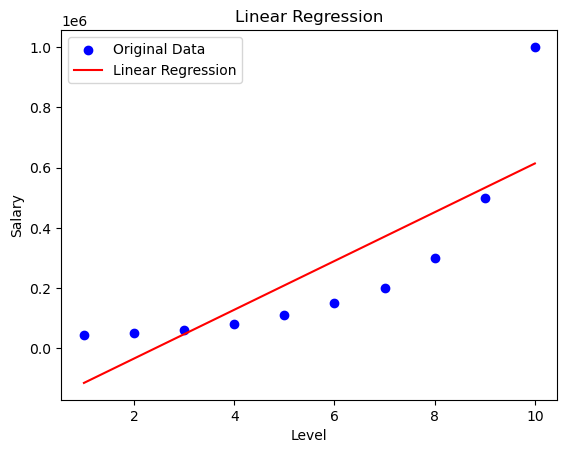

In [51]:
X = df[['Level']]
y = df['Salary']

# Instantiate the LinearRegression model
lin_reg = LinearRegression()

# Train the model on the whole dataset
lin_reg.fit(X, y)

# Make predictions
predictions = lin_reg.predict(X)

# Plotting the original data
plt.scatter(X, y, color='blue', label='Original Data')

# Plotting the linear regression line
plt.plot(X, predictions, color='red', label='Linear Regression')

plt.title('Linear Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [62]:
# Training the Polynomial Regression model on the whole datatset
from sklearn.preprocessing import PolynomialFeatures

X = df[['Level']]  # 
y = df['Salary']   # A

# Instantiate PolynomialFeatures to generate polynomial features
poly_features = PolynomialFeatures(degree=2)  # Youadjust the degree as needed

# Transform the features to polynomial features
X_poly = poly_features.fit_transform(X)

# Instantiate the LinearRegression model
poly_reg = LinearRegression()

# Train the model on the whole dataset
poly_reg.fit(X_poly, y)

# Make predictions
predictions = poly_reg.predict(X_poly)

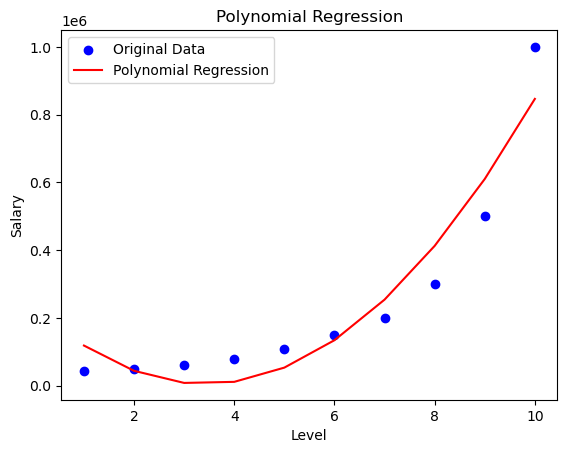

In [56]:
# Plotting the original data
plt.scatter(X, y, color='blue', label='Original Data')

# Sorting X for smoother curve plotting
X_sorted, predictions_sorted = zip(*sorted(zip(X.values, predictions)))
plt.plot(X_sorted, predictions_sorted, color='red', label='Polynomial Regression')

plt.title('Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [57]:
# predicting a new result with linear regression
lin_reg.predict([[6.5]])

C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([330378.78787879])

In [63]:
# Predicting a new result with Polynomial regression. 

# Transform the level 6.5 using the same PolynomialFeatures object
X_new = poly_features.transform([[6.5]])

# Use the transformed feature to make predictions
predicted_salary = poly_reg.predict(X_new)

print(predicted_salary)


[189498.10606061]


C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
